In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
bang=pd.read_csv(r"C:\Users\navgurukul\Downloads\Bengaluru_House_Data.csv")

# Exploratory Data Analysis (EDA)

In [46]:
bang.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [47]:
bang.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [48]:
bang.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
646,Super built-up Area,Ready To Move,Hennur Road,3 BHK,NaN,1500,2.0,2.0,62.0
7818,Plot Area,Ready To Move,Bommasandra Industrial Area,2 Bedroom,NaN,1200,3.0,0.0,45.0
10237,Built-up Area,Ready To Move,Banashankari Stage II,3 Bedroom,NaN,3000,3.0,2.0,450.0
11169,Super built-up Area,Ready To Move,Kanakpura Road,2 BHK,NaN,1120,2.0,1.0,51.0
2530,Super built-up Area,18-Jul,Electronic City Phase II,2 BHK,SNbay G,1205,2.0,1.0,75.0


In [65]:
bang.size

119880

In [49]:
bang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [50]:
bang.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [51]:
bang.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Data Cleaning

In [52]:
# fillna for using dataset

bang['location'] = bang['location'].fillna('Unknown')
bang['society']=bang['society'].fillna('Unknown')
bang['bath']=bang['bath'].fillna(0)
bang['balcony']=bang['balcony'].fillna(0)

In [53]:
# change datatype

bang['area_type'] = bang['area_type'].astype('category')
bang['size'] = bang['size'].astype('category')
bang['bath'] = bang['bath'].astype(np.int32)
bang['price'] = bang['price'].astype(np.int32)
bang['balcony'] = bang['balcony'].astype(np.int32)

In [54]:
bang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13320 non-null  category
 1   availability  13320 non-null  object  
 2   location      13320 non-null  object  
 3   size          13304 non-null  category
 4   society       13320 non-null  object  
 5   total_sqft    13320 non-null  object  
 6   bath          13320 non-null  int32   
 7   balcony       13320 non-null  int32   
 8   price         13320 non-null  int32   
dtypes: category(2), int32(3), object(4)
memory usage: 600.0+ KB


In [55]:
bang.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2,3,62


In [62]:
# size and rate

data=bang.groupby("size")
data.size()

C:\Users\navgurukul\AppData\Local\Temp\ipykernel_15664\1700144342.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=bang.groupby("size")


size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
dtype: int64

<Axes: title={'center': 'Top 10 House size and Price'}, xlabel='size', ylabel='Price'>

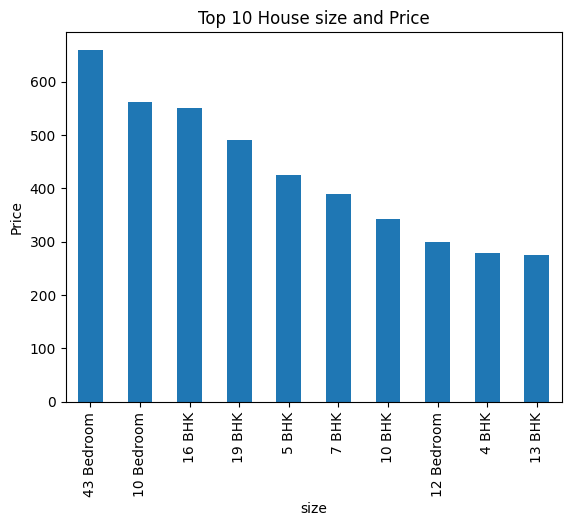

In [70]:
data["price"].mean().sort_values(ascending=False).head(10).plot(kind="bar",title="Top 10 House size and Price",ylabel="Price")

In [71]:
location=bang.groupby("location")
location.size()

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Length: 1306, dtype: int64

In [73]:
# top 10 high rate location

location["price"].sum().sort_values(ascending=False).head(10)

location
Whitefield         69064
Sarjapur  Road     47417
Rajaji Nagar       35062
Hebbal             28447
Malleshwaram       20778
Thanisandra        19325
Kanakpura Road     19201
Yelahanka          18309
Marathahalli       17867
Electronic City    16545
Name: price, dtype: int32

<Axes: title={'center': 'Top 10 house Price by location'}, xlabel='location', ylabel='Price'>

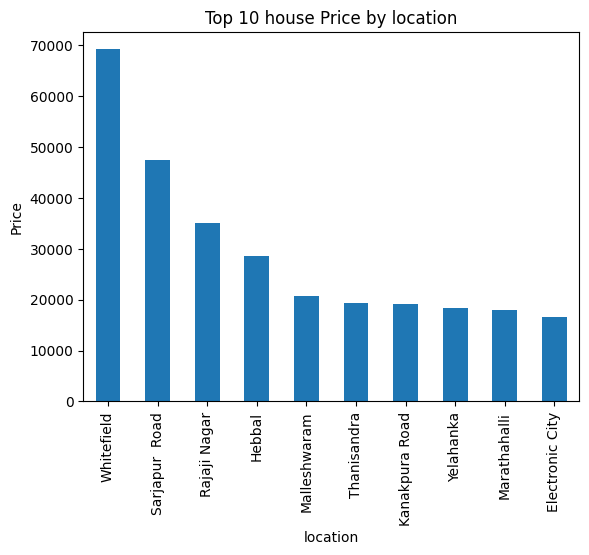

In [74]:
location["price"].sum().sort_values(ascending=False).head(10).plot(kind="bar",title="Top 10 house Price by location",ylabel="Price")

<Axes: title={'center': 'Relation Between total_sqft and Price'}, xlabel='total_sqft', ylabel='price'>

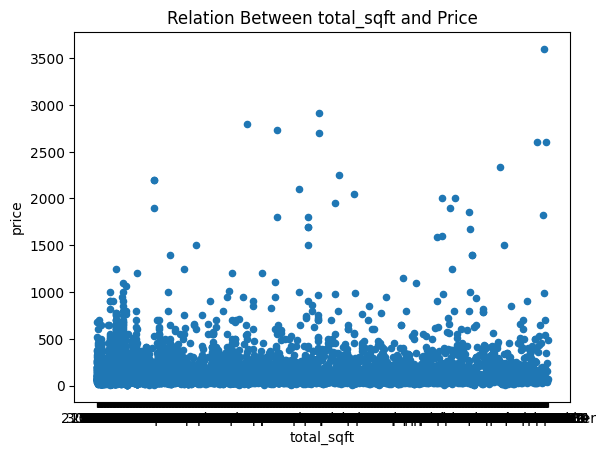

In [77]:
# realation between total_sqft and price

bang.plot(x="total_sqft",y="price",kind="scatter",title="Relation Between total_sqft and Price")

<Axes: >

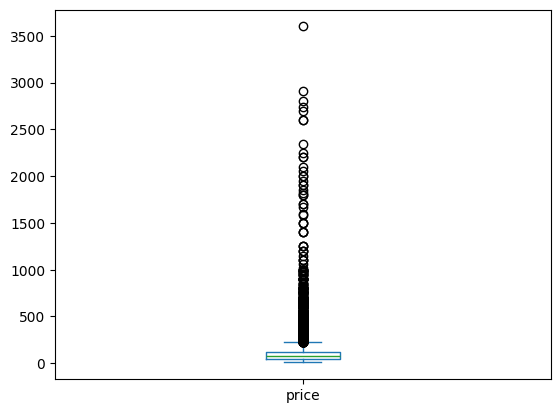

In [78]:
# 5 number summary of price

bang["price"].plot(kind="box")